In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [39]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [40]:
df = pd.read_csv('/content/gdrive/MyDrive/License/labels.csv')
df

,filepath,xmin,xmax,ymin,ymax
0,/content/gdrive/MyDrive/License/Images/07e787a...,28,342,29,106
1,/content/gdrive/MyDrive/License/Images/07bd977...,158,365,204,254
2,/content/gdrive/MyDrive/License/Images/07aaab7...,1301,1814,1715,1876
3,/content/gdrive/MyDrive/License/Images/074d85b...,142,316,148,230
4,/content/gdrive/MyDrive/License/Images/07064c2...,205,335,290,353
...,...,...,...,...,...
1655,/content/gdrive/MyDrive/License/Images/WB25.xml,17,64,116,139
1656,/content/gdrive/MyDrive/License/Images/WB23.xml,93,180,143,161
1657,/content/gdrive/MyDrive/License/Images/WB22.xml,106,164,247,264
1658,/content/gdrive/MyDrive/License/Images/WB20.xml,105,176,202,235


In [41]:
import xml.etree.ElementTree as xet

In [42]:
filename = df['filepath'][1659]
filename

'/content/gdrive/MyDrive/License/Images/WB21.xml'

In [43]:
def getFilename(filename):
   filename_image = xet.parse(filename).getroot().find('filename').text
   filepath_image = os.path.join('/content/gdrive/MyDrive/License/Images',filename_image)
   return filepath_image

In [44]:
getFilename(filename)

'/content/gdrive/MyDrive/License/Images/WB21.jpg'

In [45]:
image_path = list(df['filepath'].apply(getFilename))
image_path

['/content/gdrive/MyDrive/License/Images/07e787a7-6cc3-482c-9ce5-f0ce115b47f1___new_VW-Polo-GT-TSI-badges-on-the-boot-lid.jpg.jpeg',
 '/content/gdrive/MyDrive/License/Images/07bd977e-d578-49a2-b345-7cee5a4db6bf___new_1031520d1356604430-skoda-rapid-joins-family-edit-sold-wp_000281.jpg.jpeg',
 '/content/gdrive/MyDrive/License/Images/07aaab79-71ee-4ea3-a9e6-640191183947___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_1208484d1392541449-nissan-terrano-official-review-img_20140215_181708.jpg',
 '/content/gdrive/MyDrive/License/Images/074d85b8-42ec-4d17-9b8e-9e51ae060243___hqdefault.jpg.jpeg',
 '/content/gdrive/MyDrive/License/Images/07064c2c-2aa3-4419-91a4-92916de8e54c___mahindra-scorpio-old-car-500x500.jpg.jpeg',
 '/content/gdrive/MyDrive/License/Images/0369b20e-b432-4409-90f9-2420877aa386___8151536c79159a1557421da5f27f9f0e.jpg.jpeg',
 '/content/gdrive/MyDrive/License/Images/03273806-bb1e-48da-8c8b-a0133a90197a___2014-Skoda-Yeti-Test-Drive.jpg.jpeg',
 '/content/gdrive/MyDrive/License/Images/00b42b2

## Verify Image and Output

In [46]:
file_path = image_path[0]
file_path

'/content/gdrive/MyDrive/License/Images/07e787a7-6cc3-482c-9ce5-f0ce115b47f1___new_VW-Polo-GT-TSI-badges-on-the-boot-lid.jpg.jpeg'

In [47]:
from google.colab.patches import cv2_imshow

147 395 3


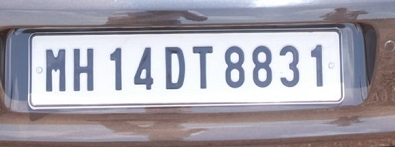

In [48]:
img = cv2.imread(file_path)
print(img.shape[0],img.shape[1],img.shape[2])
# cv2.namedWindow(cv2.WINDOW_NORMAL)
if img is not None and img.shape[0] > 0 and img.shape[1] > 0:
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Invalid image or image size.")

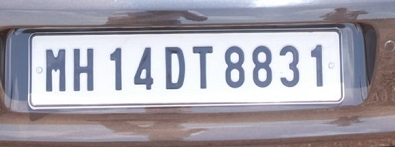

In [49]:
# 95	193	262	285
cv2.rectangle(img,(95,262),(193,285),(0,255,0),3)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
# for i in range(20):
#   file_path = image_path[i]
#   img = cv2.imread(file_path)
#   # cv2.namedWindow(cv2.WINDOW_NORMAL)
#   if img is not None and img.shape[0] > 0 and img.shape[1] > 0:
#     cv2_imshow(img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
#   else:
#     print("Invalid image or image size.")
#   cv2.rectangle(img,(df['xmin'][i],df['ymin'][i]),(df['xmax'][i],df['ymax'][i]),(0,255,0),3)
#   cv2_imshow(img)
#   cv2.waitKey(0)
#   cv2.destroyAllWindows()

## Data Preprocessing

In [51]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [52]:
labels = df.iloc[:,1:].values
labels.shape

(1660, 4)

In [53]:
data = []
output = []
for ind in range(len(image_path)):
    image = image_path[ind]
    if os.path.exists(image):
      img_arr = cv2.imread(image)
      h,w,d = img_arr.shape
      # if img_arr is not None and img_arr.shape[0] > 0 and img_arr.shape[1] > 0:
      #   cv2_imshow(img_arr)
      #   cv2.waitKey(0)
      #   cv2.destroyAllWindows()
      # else:
      #  print("Invalid image or image size.")
      # cv2.rectangle(img_arr,(df['xmin'][ind],df['ymin'][ind]),(df['xmax'][ind],df['ymax'][ind]),(0,255,0),3)
      # cv2_imshow(img_arr)
      # cv2.waitKey(0)
      # cv2.destroyAllWindows()
      load_image = load_img(image,target_size=(224,224))
      load_image_arr = img_to_array(load_image)
      norm_load_image_arr = load_image_arr/255.0 #normalization
      xmin,xmax,ymin,ymax = labels[ind]
      nxmin,nxmax = xmin/w,xmax/w
      nymin,nymax = ymin/h,ymax/h
      label_norm = (nxmin,nxmax,nymin,nymax) #normalized output
      data.append(norm_load_image_arr)
      output.append(label_norm)
    else:
      continue


In [54]:
X = np.array(data,dtype=np.float32)
y = np.array(output,dtype = np.float32)
X,y

(array([[[[0.6431373 , 0.6392157 , 0.70980394],
          [0.6509804 , 0.64705884, 0.7176471 ],
          [0.6509804 , 0.64705884, 0.7176471 ],
          ...,
          [0.5882353 , 0.6039216 , 0.7019608 ],
          [0.5803922 , 0.59607846, 0.69411767],
          [0.5764706 , 0.5921569 , 0.6901961 ]],
 
         [[0.6431373 , 0.6392157 , 0.70980394],
          [0.6509804 , 0.64705884, 0.7176471 ],
          [0.6509804 , 0.64705884, 0.7176471 ],
          ...,
          [0.5882353 , 0.6039216 , 0.7019608 ],
          [0.5803922 , 0.59607846, 0.69411767],
          [0.5764706 , 0.5921569 , 0.6901961 ]],
 
         [[0.64705884, 0.6431373 , 0.7137255 ],
          [0.64705884, 0.6431373 , 0.7137255 ],
          [0.6431373 , 0.6392157 , 0.70980394],
          ...,
          [0.5529412 , 0.5686275 , 0.6666667 ],
          [0.54509807, 0.56078434, 0.65882355],
          [0.54509807, 0.56078434, 0.65882355]],
 
         ...,
 
         [[0.38431373, 0.29411766, 0.2627451 ],
          [0.37647

In [55]:
X.shape,y.shape

((1658, 224, 224, 3), (1658, 4))

In [56]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1326, 224, 224, 3), (332, 224, 224, 3), (1326, 4), (332, 4))

# Deep Learning Model

In [57]:
from tensorflow.keras.applications import MobileNetV2, InceptionV3, InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [58]:
# inception_resnet = InceptionResNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))
# inception_resnet.trainable = False
# #-------
# headmodel = inception_resnet.output
# headmodel = Flatten()(headmodel)
# headmodel = Dense(500,activation='relu')(headmodel)
# headmodel = Dense(250,activation='relu')(headmodel)
# headmodel = Dense(4,activation='sigmoid')(headmodel)
# #-----model
# model = Model(inputs=inception_resnet.input,outputs=headmodel)
# Creating the model
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_11 (Dense)            (None, 128)               3211392   
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 4)                 260       
                                                                 
Total params: 17951108 (68.48 MB)
Trainable params: 32

In [59]:
# # compile model
# model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
# model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

### model training

In [ ]:
# from tensorflow.keras.callbacks import TensorBoard
train = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32, verbose=1)

In [ ]:
# tfb = TensorBoard('/content/gdrive/My Drive/License/object_detection2')

In [ ]:
# history = model.fit(x=x_train,y=y_train,batch_size=32,epochs=50,validation_data=(x_test,y_test),callbacks=[tfb])

In [ ]:
model.save('/content/gdrive/My Drive/License/models/object_detection2.h5')